# **GOODREADS BOOK RECOMMENDATION SYSTEM** 

 
By: 


Manita Pasi (002100976) 

Anvesh Vatsavai (002190816) 

Yash Navadiya (002193912) 

Kshitija Laware (002984668) 

# ------------------------- Data Collection -------------------------- 

We do some data collection using the fields given in our dataset, with the help of "BeautifulSoup" library. 

We use the "Bookid" and the url to fetch data from the website and create new data rows.

## Importing and Loading the libraries

In [46]:
import pandas as pd
import numpy as np
import json
import gzip
import math
import random
import time
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

In [47]:
#from google.colab import drive



## Reading the Data

In [48]:
!pip install requests

In [49]:
# Download the fantasy_10000.json file from the specified GitHub repository and save it as fantasy_10000.json
import requests

url = "https://raw.githubusercontent.com/ManitaPasi/INFO-7390-Final-Project/main/fantasy_10000.json"
response = requests.get(url)

with open("fantasy_10000.json", "wb") as f:
    f.write(response.content)

In [50]:
#Reading the fantasy_10000.json file downloaded
df = pd.read_json('fantasy_10000.json' , lines = True)

In [51]:
df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,5577844,52c8ac49496c153e4a97161e36b2db55,5,A beautiful story. Neil Gaiman is truly a uniq...,Wed Sep 24 09:29:29 -0700 2014,Wed Oct 01 00:31:56 -0700 2014,Tue Sep 30 00:00:00 -0700 2014,Sun Sep 21 00:00:00 -0700 2014,5,1
2,8842281e1d1347389f2ab93d60773d4d,17315048,885c772fb033b041f42d57cef5be0a43,5,Mark Watney is a steely-eyed missile man. A ma...,Sat Apr 05 09:30:53 -0700 2014,Wed Mar 22 11:33:10 -0700 2017,Mon Aug 25 00:00:00 -0700 2014,Sat Aug 16 00:00:00 -0700 2014,25,5
3,8842281e1d1347389f2ab93d60773d4d,13453029,46a6e1a14e8afc82d221fec0a2bd3dd0,4,A fun fast paced book that sucks you in right ...,Tue Dec 04 11:12:22 -0800 2012,Sat Jul 26 11:43:28 -0700 2014,Tue Jul 08 00:00:00 -0700 2014,Wed Jul 02 00:00:00 -0700 2014,5,1
4,8842281e1d1347389f2ab93d60773d4d,13239822,a582bfa8efd69d453a5a21a678046b36,3,"This book has a great premise, and is full of ...",Mon Jul 02 16:04:16 -0700 2012,Wed Mar 22 11:32:20 -0700 2017,Wed Aug 15 00:00:00 -0700 2012,Sun Aug 12 00:00:00 -0700 2012,7,0


# Pre processing and data collection

In [52]:
# Import the LabelEncoder class from the preprocessing module of the scikit-learn library
from sklearn import preprocessing

In [53]:
df.user_id.count()

10000

In [54]:
# Create an instance of the LabelEncoder class to encode categorical labels into numerical values
label_encoder = preprocessing.LabelEncoder()

In [55]:
# Encoding the user_id into unique label ids
df['user_id']= label_encoder.fit_transform(df['user_id'])

# Displaying the unique encoded user_ids
df['user_id'].unique()

array([341, 278, 636,   0, 626,   5, 167, 373, 448, 566, 307, 484, 180,
       135,  36, 384, 420, 543, 174, 446, 358,   1, 600,  22, 368, 103,
       450, 625,  25, 366, 153, 156, 645, 381,  50, 481, 188, 392, 540,
       524, 493, 136, 201, 452, 364, 567, 463, 138, 635,  57,  32, 127,
       284, 492, 529, 315, 224,  40, 206, 261, 235,  14, 129, 250, 512,
       166, 242, 546,  19, 582, 580, 388, 112, 475, 178, 429, 427, 332,
        67,  93, 573,  47, 391, 194, 393, 514, 536, 157, 483, 119, 294,
       319, 321, 352, 338,  63,  11, 303,   3, 230, 432,  23, 541,  75,
       533, 326,   6, 631, 624,  56,  30, 150, 123, 490, 508, 518, 124,
       482, 461, 583,  60, 609, 586, 216, 622,  55, 377, 445, 601, 154,
       606, 607, 211,   4, 469, 638, 221, 114, 590, 145, 353,  72, 507,
       342, 436, 408, 252, 253, 260, 604, 470, 229, 539, 424,  54,  45,
        26, 286, 499, 227, 460, 148,  73, 535, 309,   8, 208, 423, 345,
       330, 491,  96, 534, 548, 169, 544, 331, 285, 562, 596,  2

In [56]:
# Encoding the review_id column in the DataFrame
df['review_id']= label_encoder.fit_transform(df['review_id']) 

# Displaying the unique encoded review_ids
df['review_id'].unique()

array([8745, 3238, 5282, ..., 6475, 2948, 7715])

In [57]:
# Creating an empty dataset list
dataset = []
df['user_id'] = df['user_id'].astype(int)
df['book_id'] = df['book_id'].astype(int)
df['rating'] = df['rating'].astype(int)
df['review_id']= df['review_id'].astype(int)

# Appending the processed DataFrame to the dataset list
dataset.append(df)

In [58]:
 # Counting the number of unique book_ids in the DataFrame
 df.book_id.nunique()

6465

In [59]:
# Check to see for null values in the dataset
df.isna().sum()

user_id         0
book_id         0
review_id       0
rating          0
review_text     0
date_added      0
date_updated    0
read_at         0
started_at      0
n_votes         0
n_comments      0
dtype: int64

In [60]:
# Statistics for the dataset
df.describe()

,user_id,book_id,review_id,rating,n_votes,n_comments
count,10000.000000,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.000000
mean,338.092300,1.225775e+07,4999.50000,3.740100,1.587600,0.277800
std,177.453467,9.452557e+06,2886.89568,1.247921,11.348075,1.502149
min,0.000000,1.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,182.000000,3.072832e+06,2499.75000,3.000000,0.000000,0.000000
50%,354.000000,1.200049e+07,4999.50000,4.000000,0.000000,0.000000
75%,485.000000,1.858486e+07,7499.25000,5.000000,1.000000,0.000000
max,648.000000,3.630763e+07,9999.00000,5.000000,355.000000,45.000000


In [61]:
# Display information about the DataFrame, including the data types, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       10000 non-null  int64 
 1   book_id       10000 non-null  int64 
 2   review_id     10000 non-null  int64 
 3   rating        10000 non-null  int64 
 4   review_text   10000 non-null  object
 5   date_added    10000 non-null  object
 6   date_updated  10000 non-null  object
 7   read_at       10000 non-null  object
 8   started_at    10000 non-null  object
 9   n_votes       10000 non-null  int64 
 10  n_comments    10000 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 859.5+ KB


In [62]:
# Define the base URL for Goodreads book pages
w = 'https://www.goodreads.com/book/show/'

# Create a new column 'web' in the DataFrame (df) by concatenating the base URL with the existing book IDs
df['web'] = w + df['book_id'].astype(str)

In [63]:
df

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,web
0,341,18245960,8745,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1,https://www.goodreads.com/book/show/18245960
1,341,5577844,3238,5,A beautiful story. Neil Gaiman is truly a uniq...,Wed Sep 24 09:29:29 -0700 2014,Wed Oct 01 00:31:56 -0700 2014,Tue Sep 30 00:00:00 -0700 2014,Sun Sep 21 00:00:00 -0700 2014,5,1,https://www.goodreads.com/book/show/5577844
2,341,17315048,5282,5,Mark Watney is a steely-eyed missile man. A ma...,Sat Apr 05 09:30:53 -0700 2014,Wed Mar 22 11:33:10 -0700 2017,Mon Aug 25 00:00:00 -0700 2014,Sat Aug 16 00:00:00 -0700 2014,25,5,https://www.goodreads.com/book/show/17315048
3,341,13453029,2764,4,A fun fast paced book that sucks you in right ...,Tue Dec 04 11:12:22 -0800 2012,Sat Jul 26 11:43:28 -0700 2014,Tue Jul 08 00:00:00 -0700 2014,Wed Jul 02 00:00:00 -0700 2014,5,1,https://www.goodreads.com/book/show/13453029
4,341,13239822,6420,3,"This book has a great premise, and is full of ...",Mon Jul 02 16:04:16 -0700 2012,Wed Mar 22 11:32:20 -0700 2017,Wed Aug 15 00:00:00 -0700 2012,Sun Aug 12 00:00:00 -0700 2012,7,0,https://www.goodreads.com/book/show/13239822
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,456,26168646,635,4,*I got this book from Netgalley in exchange fo...,Wed Sep 14 13:16:05 -0700 2016,Thu Jan 26 08:48:05 -0800 2017,Sun Jan 22 00:00:00 -0800 2017,Fri Jan 20 00:00:00 -0800 2017,9,0,https://www.goodreads.com/book/show/26168646
9996,456,6426708,4314,4,"I quite enjoyed Carmilla. Obviously, there was...",Mon Sep 12 13:03:13 -0700 2016,Tue Oct 25 11:44:22 -0700 2016,Fri Oct 07 00:00:00 -0700 2016,Thu Oct 06 00:00:00 -0700 2016,4,0,https://www.goodreads.com/book/show/6426708
9997,456,30809786,6475,0,Hmm... You can't be serious... 2018????? This ...,Sun Sep 11 07:22:09 -0700 2016,Sun Sep 11 08:28:23 -0700 2016,,,0,0,https://www.goodreads.com/book/show/30809786
9998,456,22296822,2948,2,RTC,Mon Aug 29 17:00:10 -0700 2016,Sun Mar 05 03:46:03 -0800 2017,Tue Feb 28 00:00:00 -0800 2017,Sun Feb 19 00:00:00 -0800 2017,1,0,https://www.goodreads.com/book/show/22296822


In [64]:
# Concatenating 'web' and 'book_id' columns to create a new 'book_names' column
df["book_names"] = df["web"]+ df["book_id"].astype(str)

In [65]:
# Dropping the 'web' column from the DataFrame
df = df.drop('web', axis = 1)

# Converting date added column to extract year from it

In [66]:
# Import the requests library to send HTTP requests and handle the response
import requests

# Import the random library to generate random numbers and random selections
import random

# Import the urlopen function from the urllib.request module to open URLs
from urllib.request import urlopen

# Import the BeautifulSoup class from the bs4 module for web scraping and parsing HTML
from bs4 import BeautifulSoup

Web Scraping Book Information from Goodreads



In [67]:
# # Sending a GET request to the Goodreads URL and creating a BeautifulSoup object
# reqs = requests.get("https://www.goodreads.com/book/show/5577844")
# soup = BeautifulSoup(urlopen("https://www.goodreads.com/book/show/18245960"))
# # soup.find("p", {"data-testid": "publicationInfo"}).text

# # Extracting the publication year from the page
# int(soup.find("p", {"data-testid": "publicationInfo"}).text[-4:])


In [68]:
# Extracting the book title from the page
#soup.find("h1",{"class":"Text Text__title1"}).text

In [69]:
# Extracting the number of pages from the page
#int(soup.find("p",{"data-testid":"pagesFormat"}).text.split("pages")[0].strip())

In [70]:
# Extracting the author's name from the page
#soup.find("span",{"class":"ContributorLink__name","data-testid":"name"}).text

In [71]:
# Extracting the number of reviews from the page
#soup.find("span",{"data-testid":"reviewsCount"}).text

In [72]:
# Extracting the average rating from the page
#float(soup.find("div",{"class":"RatingStatistics__rating"}).text)

We collect the following Things from the website which we further utilize to build our data model:

1) Book Title

2) Ratings (Average)

3) Total Ratings

4) Page count

5) Authors

6) Publish Date

7) Review Count

In [73]:
# Given there are unique book ids,we now take only unique ids from our dataset
ids=np.unique(df['book_id'])

len(ids)

6465

In [74]:
# Creating empty lists to store book data
title = []
mapped_id = []
avg_rating = []
page_count = []
author = []
publish_date = []
review_count = []

## Running the following commented code collects the data from the web url. 

(This code takes 8+ hours to collect the data points)

In [75]:
# # Defining the URL and selecting the first book id from the ids array
# url = "https://www.goodreads.com/book/show/"
# link = url + str(ids[0])

# # Scraping the webpage for the book and extracting the publication year
# soup = BeautifulSoup(urlopen(link))
# pub_year = int(soup.find("p", {"data-testid": "publicationInfo"}).text[-4:])

# title=[]
# mapped_id=[]
# avg_rating=[]
# page_count=[]
# author=[]
# publish_date=[]
# review_count=[]

# url="https://www.goodreads.com/book/show/"

# for id in ids:
#   link=url+str(id)
#   try:
#     soup = BeautifulSoup(urlopen(link))
#   except:
#     print(id)
#     continue
#   try:
#     mapped_id.append(id)
#   except:
#     mapped_id.append("NF")
#   try:
#     publish_date.append(int(soup.find("p", {"data-testid": "publicationInfo"}).text[-4:]))
#   except:
#     publish_date.append("NF")
#   try:
#     title.append(soup.find("h1",{"class":"Text Text__title1"}).text)
#   except:
#     title.append("NF")
#   try:
#     review_count.append(soup.find("span",{"data-testid":"reviewsCount"}).text)
#   except:
#     review_count.append("NF")
#   try:
#     avg_rating.append(float(soup.find("div",{"class":"RatingStatistics__rating"}).text))
#   except:
#     avg_rating.append("NF")  
#   try:
#     author.append(soup.find("span",{"class":"ContributorLink__name","data-testid":"name"}).text)
#   except:
#     author.append("NF")
#   try:
#     page_count.append(int(soup.find("p",{"data-testid":"pagesFormat"}).text.split("pages")[0].strip()))
#   except:
#     page_count.append("NF")

# d=pd.DataFrame()
# d['id']=mapped_id
# d['book']=title
# d['#pages']=page_count
# d['author']=author
# d['publish_year']=publish_date
# d['review_count']=review_count
# d['avg_rating']=avg_rating

# d.to_csv("book-1.csv")


# ----------------- Data Exploration and Analysis ------------------

In [76]:
#Import Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn import preprocessing

## We save the information collected in this dataframe and load it accordingly

In [77]:
# Download the books-1.csv file from the specified GitHub repository and save it as books-1.csv
import requests

url = "https://raw.githubusercontent.com/ManitaPasi/INFO-7390-Final-Project/main/books-1.csv"
response = requests.get(url)

with open("books-1.csv", "wb") as f:
    f.write(response.content)

In [78]:
# Reading CSV file and storing the data in a pandas DataFrame
data = pd.read_csv("books-1.csv",on_bad_lines='skip')

In [79]:
# Displaying the first few rows of the DataFrame
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


## The dataset that contains information about the books, who wrote these books and other relevant information. Now that we know what our data looks like, let’s go ahead and find all the null values present in our data:

In [80]:
# Checking if there are any missing values in the DataFrame
data.isnull().values.any() 

False

In [81]:
# Displaying information about the DataFrame, such as data type and non-null value count
data.describe()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,13714.000000,13714.000000,1.371400e+04,13714.000000,1.371400e+04,13714.000000
mean,22159.859195,3.930620,9.764017e+12,342.402727,1.776540e+04,533.632128
std,13700.926816,0.357893,3.987679e+11,252.650165,1.129572e+05,2529.006691
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10619.250000,3.770000,9.780345e+12,196.000000,8.300000e+01,7.000000
50%,21321.500000,3.960000,9.780613e+12,301.000000,6.305000e+02,40.000000
75%,33311.750000,4.130000,9.780940e+12,421.000000,4.742250e+03,222.000000
max,47709.000000,5.000000,9.790008e+12,6576.000000,5.629932e+06,93619.000000


## From the results above, we can see that our scores are all between 0 and 5. We also get to know more about the other columns, such as the average of the mean scores and other information that might help us in the next steps. We also checked the data types of each column and also saw that there were no null values present in our data. 

##Drawing a Normal curve on the histograms could help understand the distribution type

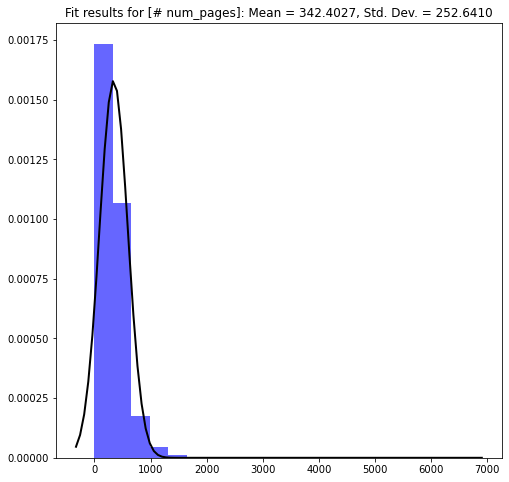

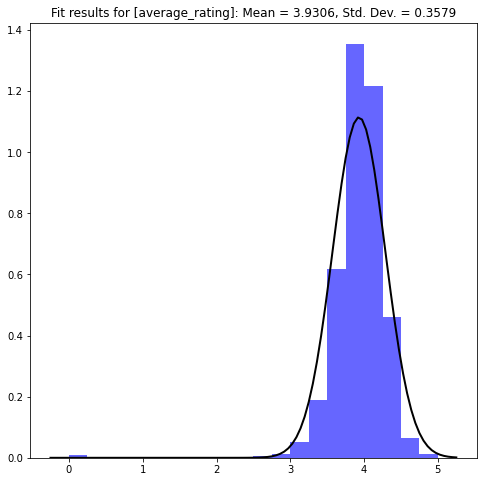

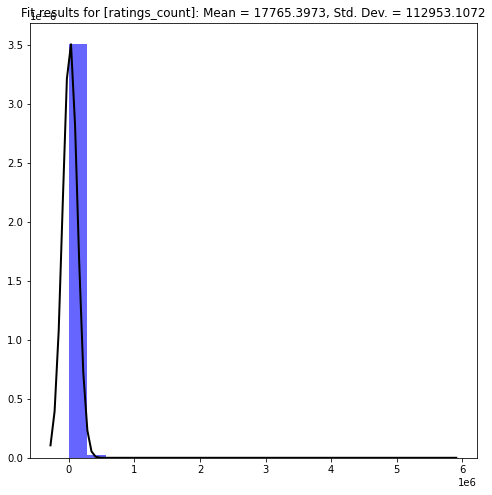

In [82]:
# Importing required libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Defining a function to plot histograms with normal curve
def plot_histogram_with_normal_curve(df_col, var_name, bins=20, color='b'):
    d_mean, d_std = norm.fit(df_col)
    plt.figure(figsize=(8, 8))
    
    # Plot histogram
    plt.hist(df_col, bins, density=True, alpha=0.6, color=color)
    
    # Plot PDF
    xmin, xmax = plt.xlim()
    x_lin = np.linspace(xmin, xmax, 100)
    pdf = norm.pdf(x_lin, d_mean, d_std)
    plt.plot(x_lin, pdf, 'k', linewidth=2)
    title = "Fit results for [%s]: Mean = %.4f, Std. Dev. = %.4f" % (var_name, d_mean, d_std)
    plt.title(title)
    plt.show()

# Creating histogram with normal curve for # num_pages
plot_histogram_with_normal_curve(data['# num_pages'], "# num_pages")

# Creating histogram with normal curve for average_rating
plot_histogram_with_normal_curve(data['average_rating'], "average_rating")

# Creating histogram with normal curve for ratings_count
plot_histogram_with_normal_curve(data['ratings_count'], "ratings_count")

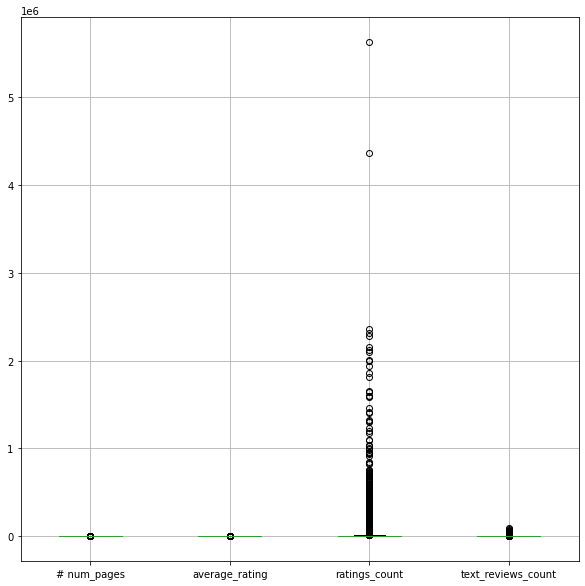

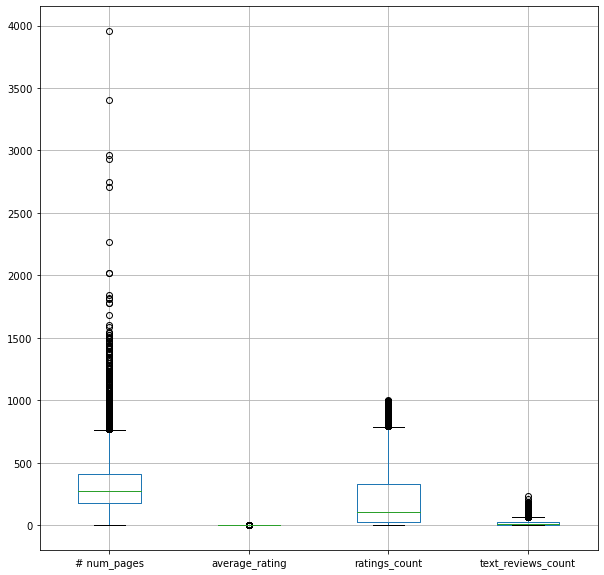

In [83]:
# Importing required library
import matplotlib.pyplot as plt

# Creating a boxplot for the selected columns in the entire dataset
plt.figure(figsize=(10, 10))
data.boxplot(column=['# num_pages', 'average_rating', 'ratings_count', 'text_reviews_count'])
plt.show()

# Creating a boxplot for the selected columns in the filtered dataset
df_filtered = data[data['ratings_count'] < 1000]
plt.figure(figsize=(10, 10))
df_filtered.boxplot(column=['# num_pages', 'average_rating', 'ratings_count', 'text_reviews_count'])
plt.show()

In [84]:
# Defining the list of categorical variables
categorical_vars = ['title', 'authors', 'isbn', 'language_code']

# Generating descriptive statistics for the categorical variables
cat_summary = data[categorical_vars].describe()

# Printing the summary of categorical variables
print(cat_summary)

               title          authors        isbn language_code
count          13714            13714       13714         13714
unique         12422             7600       13714            30
top     'Salem's Lot  Agatha Christie  0439785960           eng
freq              11               69           1         10594


In [85]:
# Importing required libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Defining a function to plot histograms with normal curve
def PlotHistogramsWithNormalCurve(data, title):
    # Create histogram
    fig, ax = plt.subplots()
    ax.hist(data, density=True, bins=25, alpha=0.6, color='b')

    # Create a normal curve with the same mean and standard deviation as the data
    mu, std = norm.fit(data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2)

    # Add labels and title
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(title)

    # Display the plot
    plt.show()

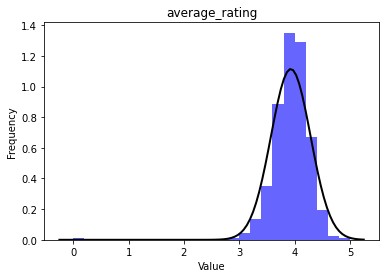

In [86]:
#'average_rating' is Normally distributed
PlotHistogramsWithNormalCurve(data['average_rating'], "average_rating")

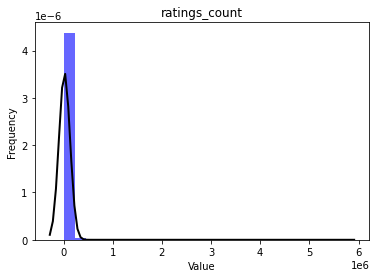

In [87]:
#'ratings_count' is possibly left skewed but could there be extreme values in the distribution causing it to be skewed
PlotHistogramsWithNormalCurve(data['ratings_count'], "ratings_count")

#Box-plots could help detect variables with outliers

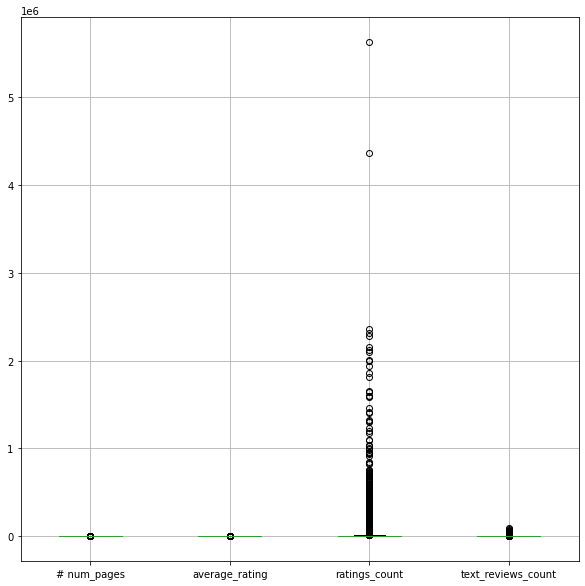

In [88]:
# Importing required library
import matplotlib.pyplot as plt

# Creating a boxplot for the selected columns in the entire dataset
plt.figure(figsize=(10, 10))
data.boxplot(column=['# num_pages', 'average_rating', 'ratings_count', 'text_reviews_count'])

# Displaying the boxplot
plt.show()

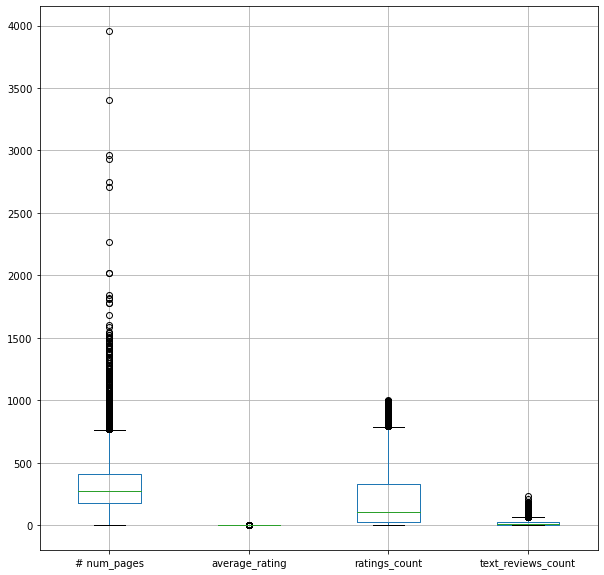

In [89]:
# Importing required library
import matplotlib.pyplot as plt

# Filtering the data to include only rows with ratings_count less than 1000
df2 = data[(data['ratings_count'] < 1000)]

# Creating a boxplot for the selected columns
plt.figure(figsize=(10, 10))
df2.boxplot(column=['# num_pages', 'average_rating', 'ratings_count', 'text_reviews_count'])

# Displaying the plot
plt.show()

In [90]:
# Defining the list of categorical variables
categoricalVars = ['title', 'authors', 'isbn', 'language_code']

# Generating descriptive statistics for the categorical variables
data[categoricalVars].describe()

,title,authors,isbn,language_code
count,13714,13714,13714,13714
unique,12422,7600,13714,30
top,'Salem's Lot,Agatha Christie,0439785960,eng
freq,11,69,1,10594


#We can infer details about unique values in these variables. Also some other info from the above table,

#Looks like the top recurring book title is "Salem's Lot" (count of 11)
#Agatha Christie is the author with the most books (count of 69)
#Most of the books are in English (10594/13714)

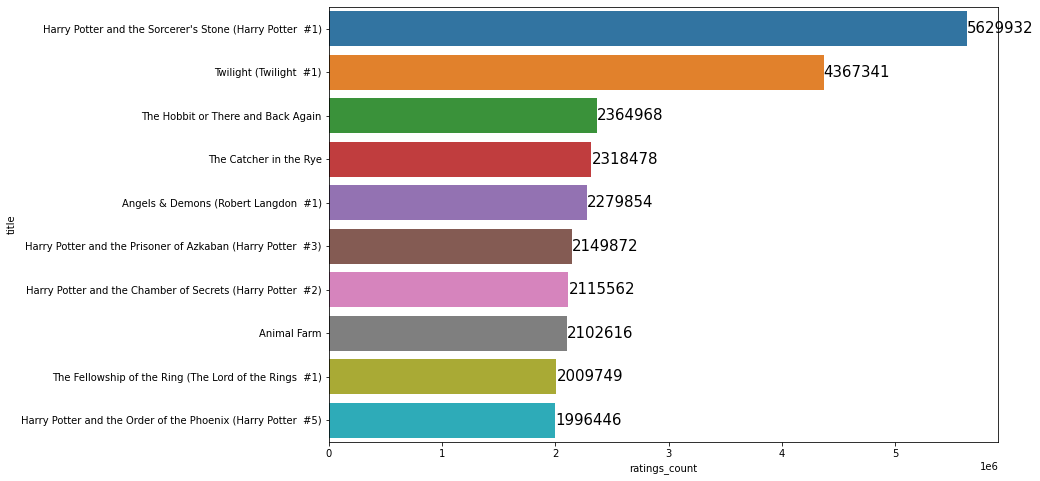

In [91]:
# Importing required library
import seaborn as sns

# Selecting the top 10 rated books based on ratings_count
top10Books = data.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']

# Setting plot dimensions and creating a bar plot
plot_dims = (12, 8)
fig, ax = plt.subplots(figsize=plot_dims)
sns.barplot(x=top10Books, y=top10Books.index)

# Adding the count labels to the plot
for i in ax.patches:
    ax.text(i.get_width() + 0.3, i.get_y() + 0.5, str(round(i.get_width())), fontsize=15, color='k')

# Displaying the plot
plt.show()

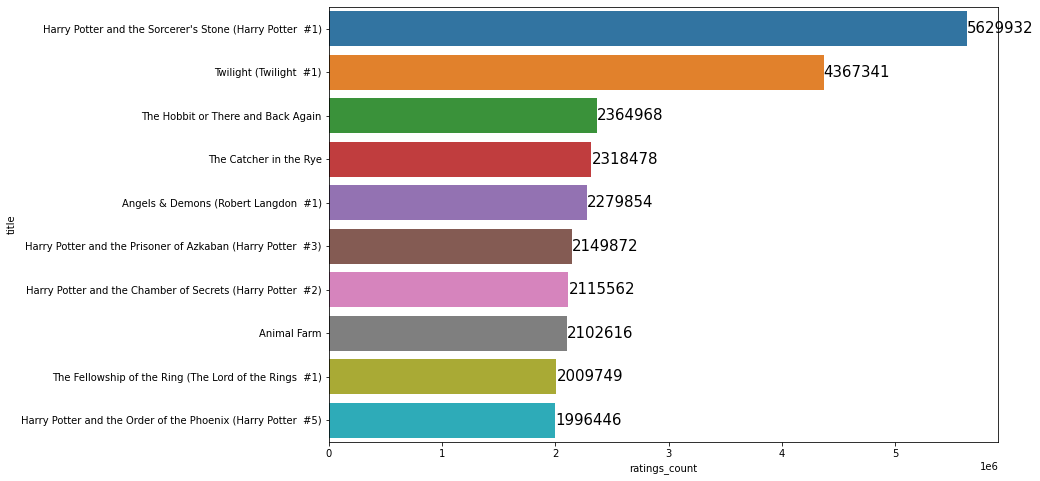

In [92]:
# # Let's look at the top 10 rated books
top10Books = data.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
plot_dims = (12, 8)
fig, ax = plt.subplots(figsize=plot_dims)
sns.barplot(x=top10Books, y=top10Books.index)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 15, color = 'k')
    
plt.show()

## The results above show us the top 10 books in our data. We saw that the max score in our data was 5.0 but we don’t see any books in the above result with a score of 5.0. Indeed, we have filtered these books according to the number of notes. We’ve made sure that all of the books we have in the above results have a decent rating. There may be books in the data that may have only 1 or 2 notes may be rated 5.0. We want to avoid such books, which is why we used this type of filtering.

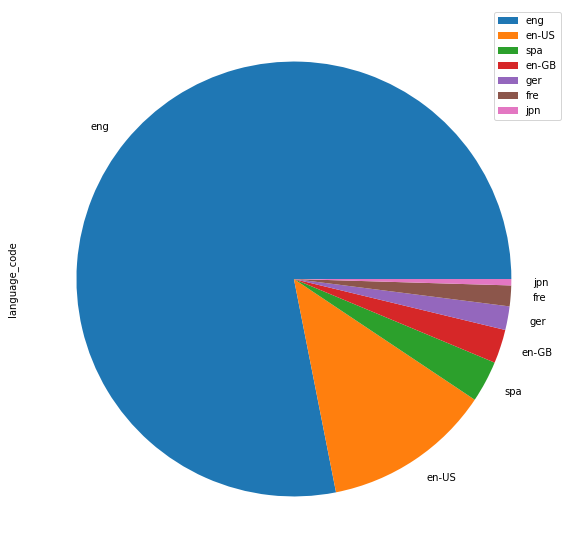

In [93]:
# Books categorized based on languages (Top 7)
data['language_code'].value_counts().head(7).plot(kind = 'pie', figsize=(10, 10)).legend()
plt.show()

## Let’s go ahead and take a look at some of the top authors in our data. We’ll rank them according to the number of books they’ve written as long as those books are present in the data

7600
                             title
authors                           
J.R.R. Tolkien                  31
Dan Simmons                     32
Margaret Weis-Tracy Hickman     33
Piers Anthony                   34
Terry Brooks                    40
P.G. Wodehouse                  42
Rumiko Takahashi                46
Orson Scott Card                48
Stephen King                    66
Agatha Christie                 69


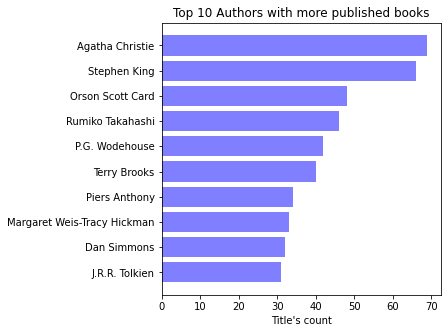

In [94]:
# Which authors wrote the most books (peek into the top 10)?

# Get the unique authors from the 'authors' column in the dataset
allAuthors = data.authors.unique()

# Create an array of positions for plotting, with the same length as the number of unique authors
y_pos = np.arange(len(allAuthors))

# Print the total number of unique authors
print(len(allAuthors))

# Group the dataset by 'authors', count the number of books (using the 'title' column), and store the result in top10Authors
top10Authors = data[['authors', 'title']].groupby(['authors']).count()

# Sort the top10Authors DataFrame by the number of books in ascending order
top10Authors = top10Authors.sort_values(by=['title'], ascending=True)

# Select the top 10 authors with the most books
top10Authors = top10Authors.tail(10)

# Print the top 10 authors with the most books
print(top10Authors)

# Create a horizontal bar chart to visualize the top 10 authors with the most books
plt.figure(figsize=(5, 5))
y_NoTitles = top10Authors['title']
plt.barh(top10Authors.index.values, y_NoTitles, 0.8, align='center', alpha=0.5, color='blue')

# Label the x-axis
plt.xlabel("Title's count")

# Add a title to the chart
plt.title('Top 10 Authors with more published books')

# Set the y-axis ticks to the author names
plt.yticks(top10Authors.index.values, top10Authors.index.values)

# Display the chart
plt.show()

#Feature engineering: Based on our domain knowledge and insights from EDA, we have created new features or modify existing ones to improve the predictive performance of your models

In [95]:
#1.Create a feature for the author's total number of books:

author_books_count = data['authors'].value_counts().to_dict()
data['author_total_books'] = data['authors'].apply(lambda x: author_books_count[x])

In [96]:
#2.Create a feature for the book's title length:

data['title_length'] = data['title'].apply(lambda x: len(x))

In [97]:
#3. Extract publication year from the title and create a new feature:

import re

def extract_year(title):
    year = re.findall(r'\(([1-2][0-9]{3})\)', title)
    if year:
        return int(year[0])
    else:
        return None

data['publication_year'] = data['title'].apply(extract_year)


In [98]:
#4. Create a feature for the book's average rating bin:
# change 

def rating_bin(rating):

    if rating < 3.5:
        return 0
    elif rating >= 3.5 and rating < 4:
        return 1
    elif rating >= 4: 
        return 2

data['average_rating_bin'] = data['average_rating'].apply(rating_bin)

In [99]:
data_orig=data.copy()

In [100]:
# Drop unnecessary columns
data.drop(['bookID','isbn', 'isbn13', 'title', 'authors'], axis=1, inplace=True)

# Replace missing values in publication_year with median value
median_year = data['publication_year'].median()
data['publication_year'].fillna(median_year, inplace=True)

# Convert publication_year and num_pages columns to integers
data['publication_year'] = data['publication_year'].astype(int)
data['# num_pages'] = data['# num_pages'].astype(int)

# One-hot encode the language_code column
data = pd.get_dummies(data, columns=['language_code'])

In [101]:
data["average_rating_bin"] 

0        2
1        2
2        2
3        2
4        2
        ..
13709    1
13710    1
13711    1
13712    2
13713    2
Name: average_rating_bin, Length: 13714, dtype: int64

In [102]:
from sklearn.utils import resample
import pandas as pd

# Assuming your dataset is a pandas dataframe named 'data'
# Separate data by class
class_0 = data[data['average_rating_bin'] == 0]
class_1 = data[data['average_rating_bin'] == 2]
class_2 = data[data['average_rating_bin'] == 1]

# Resample the classes with fewer samples
n_samples = len(class_0)
class_1_resampled = resample(class_1, replace=True, n_samples=n_samples, random_state=42)
class_2_resampled = resample(class_2, replace=True, n_samples=n_samples, random_state=42)

# Combine the resampled classes with the original class
resampled_data = pd.concat([class_0, class_1_resampled, class_2_resampled])

<AxesSubplot:>

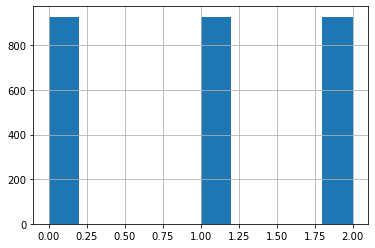

In [103]:
resampled_data["average_rating_bin"].hist()

In [104]:
# from google.colab import drive
# drive.mount('/content/drive')

# **Data Modeling**

# ********************************Classification Models ****************************

1. Implementation of an XGBoost model in Python for a classification problem

In [105]:
!pip install xgboost

In [106]:
# Importing required libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

# Loading the data and assigning features and target
data = resampled_data
X = resampled_data.drop("average_rating_bin",axis = 1)
Y = resampled_data["average_rating_bin"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

# Converting data to XGBoost DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Defining XGBoost parameters
params = {
    'max_depth': 3,
    'objective': 'reg:squarederror',
    'eval_metric': 'logloss'
}

# Training the XGBoost model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Making predictions on testing data
y_pred = model.predict(dtest)
y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred]

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred_binary)
print("F1_score: " ,(f1_score(np.array(y_test),y_pred_binary,average='weighted')))
print("Recall: ", recall_score(np.array(y_test),y_pred_binary,average='weighted'))
print("Precision: ", precision_score(np.array(y_test),y_pred_binary,average='weighted'))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

F1_score:  0.5485916151220471
Recall:  0.6606822262118492
Precision:  0.49329758713136734
Accuracy: 66.07%


/Users/manitapasi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. Implementation of a Support Vector Machine (SVM) model for a classification problem

In [107]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Loading the data and assigning features and target
data = resampled_data
X = resampled_data.drop("average_rating_bin",axis=1)
y = resampled_data["average_rating_bin"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining SVM model with radial basis function kernel
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Training the SVM model
svm.fit(X_train, y_train)

# Making predictions on testing data
y_pred = svm.predict(X_test)

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
print("F1_score: " ,(f1_score(np.array(y_test),y_pred,average='weighted')))
print("Recall: ", recall_score(np.array(y_test),y_pred,average='weighted'))
print("Precision: ", precision_score(np.array(y_test),y_pred,average='weighted'))
print("Accuracy: %.2f%%" % (accuracy * 100.0))


F1_score:  0.9175787691361349
Recall:  0.9174147217235189
Precision:  0.917846908407371
Accuracy: 91.74%


3. Implementation of a k-Nearest Neighbors (KNN) model for a classification problem

In [108]:
# Importing required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load data
data = resampled_data
X = resampled_data.drop("average_rating_bin",axis=1)
y = resampled_data["average_rating_bin"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train KNN model
knn.fit(X_train, y_train)

# Make predictions on testing data
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("F1_score: " ,(f1_score(np.array(y_test),y_pred,average='weighted')))
print("Recall: ", recall_score(np.array(y_test),y_pred,average='weighted'))
print("Precision: ", precision_score(np.array(y_test),y_pred,average='weighted'))
print("Accuracy: %.2f%%" % (accuracy * 100.0))


F1_score:  0.8622971225628427
Recall:  0.8617594254937163
Precision:  0.8641118941676778
Accuracy: 86.18%


4. Gaussian Naive Bayes (NB) classifier for a classification problem

In [109]:
# Importing required libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load dataset
data = resampled_data
X = resampled_data.drop("average_rating_bin",axis=1)
y = resampled_data["average_rating_bin"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Naive Bayes classifier
clf = GaussianNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the classes of the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = clf.score(X_test, y_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("F1_score: " ,(f1_score(np.array(y_test),y_pred,average='weighted')))
print("Recall: ", recall_score(np.array(y_test),y_pred,average='weighted'))
print("Precision: ", precision_score(np.array(y_test),y_pred,average='weighted'))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

F1_score:  0.2809504309190875
Recall:  0.3791866028708134
Precision:  0.4845839506037299
Accuracy: 37.92%


5. k-Nearest Neighbors (KNN) classifier with Grid Search Cross Validation for a classification problem

In [110]:
# Importing required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV

# Load dataset
data = resampled_data
X = resampled_data.drop("average_rating_bin",axis=1)
y = resampled_data["average_rating_bin"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2, 3, 4]}

# Perform GridSearchCV to find the best hyperparameters
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", grid.best_params_)
print("Best Accuracy Score: ", grid.best_score_ * 100.0)

# Use the best model to make predictions on the test set
y_pred = grid.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("F1_score: " ,(f1_score(np.array(y_test),y_pred,average='weighted')))
print("Recall: ", recall_score(np.array(y_test),y_pred,average='weighted'))
print("Precision: ", precision_score(np.array(y_test),y_pred,average='weighted'))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Best Hyperparameters:  {'n_neighbors': 11, 'p': 1}
Best Accuracy Score:  86.86138026497923
F1_score:  0.8709319072795947
Recall:  0.8708133971291866
Precision:  0.8720715882991847
Accuracy: 87.08%


6. Gaussian Naive Bayes (NB) classifier with Grid Search Cross Validation for a classification problem

In [111]:
# Importing required libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import GridSearchCV

# Load dataset
data = resampled_data
X = resampled_data.drop("average_rating_bin",axis=1)
y = resampled_data["average_rating_bin"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Naive Bayes classifier
clf = GaussianNB()

# Define the hyperparameter grid
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Perform GridSearchCV to find the best hyperparameters
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", grid.best_params_)
print("Best Accuracy Score: ", grid.best_score_ * 100.0)

# Train the classifier on the training data using the best hyperparameters
clf = GaussianNB(var_smoothing=grid.best_params_['var_smoothing'])
clf.fit(X_train, y_train)

# Predict the classes of the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("F1_score: " ,(f1_score(np.array(y_test),y_pred,average='weighted')))
print("Recall: ", recall_score(np.array(y_test),y_pred,average='weighted'))
print("Precision: ", precision_score(np.array(y_test),y_pred,average='weighted'))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Best Hyperparameters:  {'var_smoothing': 1e-08}
Best Accuracy Score:  38.03836266561202
F1_score:  0.2716601642587689
Recall:  0.37440191387559807
Precision:  0.5134745070084424
Accuracy: 37.44%


In [112]:
# Combine selected features from the DataFrame 'X' into a new DataFrame called 'features'
# The selected features are 'ratings_count', 'text_reviews_count', 'average_rating', and 'author_total_books'
# The 'pd.concat' function is used to concatenate these columns along the horizontal axis (axis=1)
features = pd.concat([X['ratings_count'], 
                      X['text_reviews_count'], 
                      X['average_rating'], 
                      X['author_total_books']], axis=1)

In [113]:
# Import the MinMaxScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler class
min_max_scaler = MinMaxScaler()

# Apply the MinMaxScaler to the 'features' DataFrame
# This scales the feature values to a range of [0, 1] for each column
# The fit_transform() method computes the minimum and maximum values for each feature, and then scales the data accordingly
features = min_max_scaler.fit_transform(features)

In [114]:
# Import the NearestNeighbors class from the sklearn.neighbors module
from sklearn.neighbors import NearestNeighbors

# Create an instance of the NearestNeighbors class with 6 nearest neighbors and the 'ball_tree' algorithm
model = NearestNeighbors(n_neighbors=6, algorithm='ball_tree')

# Fit the model to the 'features' data
model.fit(features)

# Find the nearest neighbors for each data point in 'features'
# The kneighbors() method returns two arrays: 'dist' contains the distances to the nearest neighbors,
# and 'idlist' contains the indices of the nearest neighbors
dist, idlist = model.kneighbors(features)

In [115]:
# Import additional libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV

In [116]:
# Perform hyperparameter tuning for all models
# Split the dataset into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# XGBoost
# Define a parameter grid for hyperparameter tuning
xgb_params = {'max_depth': [8, 13], 'learning_rate': [0.1, 0.5], 'n_estimators': [50, 100]}

# Create an instance of the XGBClassifier
xgb_model = xgb.XGBClassifier()

# Perform a grid search with 5-fold cross-validation using the parameter grid
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=5)

# Fit the grid search model to the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best estimator (model) found by the grid search
best_xgb = grid_search_xgb.best_estimator_



# SVM
# Define a parameter grid for hyperparameter tuning
svm_params = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.1, 1, 10]}

# Create an instance of the SVC (Support Vector Classifier) with the 'rbf' kernel
svm_model = SVC(kernel='rbf')

# Perform a grid search with 5-fold cross-validation using the parameter grid
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=svm_params, cv=5)

# Fit the grid search model to the training data
grid_search_svm.fit(X_train, y_train)

# Get the best estimator (model) found by the grid search
best_svm = grid_search_svm.best_estimator_



# KNN
# Define a parameter grid for hyperparameter tuning
knn_params = {'n_neighbors': [3, 5, 7, 9]}

# Create an instance of the KNeighborsClassifier
knn_model = KNeighborsClassifier()

# Perform a grid search with 5-fold cross-validation using the parameter grid
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=knn_params, cv=5)

# Fit the grid search model to the training data
grid_search_knn.fit(X_train, y_train)

# Get the best estimator (model) found by the grid search
best_knn = grid_search_knn.best_estimator_

## Accuracy is chosen as the main performance metric for these algorithms. The reason is that accuracy is a simple and intuitive metric that measures the proportion of correct predictions out of the total predictions made by the model. It works well for balanced datasets where the target classes have similar frequencies. Since the dataset is resampled to balance the classes, accuracy is a suitable performance metric in this case.

/Users/manitapasi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


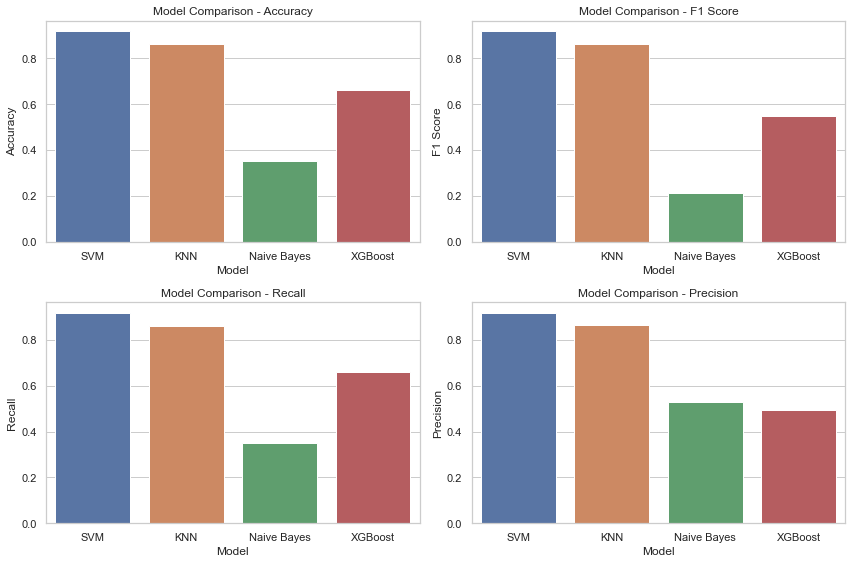

In [117]:
# Import additional libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data and assign features and target
data = resampled_data
X = resampled_data.drop("average_rating_bin", axis=1)
y = resampled_data["average_rating_bin"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# *************Converting data to XGBoost DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_test = y_test.to_numpy()

# Define models with default hyperparameters
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
knn = KNeighborsClassifier()
nb = GaussianNB()
# xgb = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.8, colsample_bytree=0.8, seed=42)
params = {
    'max_depth': 3,
    'objective': 'reg:squarederror',
    'eval_metric': 'logloss'
}

# Train the models
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)
nb.fit(X_train, y_train)
# xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on testing data
svm_pred = svm.predict(X_test)
knn_pred = knn.predict(X_test)
nb_pred = nb.predict(X_test)
# xgb_pred = xgb.predict(X_test)
# Making predictions on testing data
y_pred = model.predict(dtest)
y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred]

# Calculate model performance metrics
svm_accuracy = accuracy_score(y_test, svm_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)
# xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_accuracy = accuracy_score(y_test, y_pred_binary)

svm_f1 = f1_score(y_test, svm_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_pred, average='weighted')
nb_f1 = f1_score(y_test, nb_pred, average='weighted')
# xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')
xgb_f1 = f1_score(np.array(y_test),y_pred_binary,average='weighted')

svm_recall = recall_score(y_test, svm_pred, average='weighted')
knn_recall = recall_score(y_test, knn_pred, average='weighted')
nb_recall = recall_score(y_test, nb_pred, average='weighted')
# xgb_recall = recall_score(y_test, xgb_pred, average='weighted')
xgb_recall = recall_score(np.array(y_test),y_pred_binary,average='weighted')

svm_precision = precision_score(y_test, svm_pred, average='weighted')
knn_precision = precision_score(y_test, knn_pred, average='weighted')
nb_precision = precision_score(y_test, nb_pred, average='weighted')
# xgb_precision = precision_score(y_test, xgb_pred, average='weighted')
xgb_precision = precision_score(np.array(y_test),y_pred_binary,average='weighted')

# Create a dataframe to store model performance metrics

data = {'Model': ['SVM', 'KNN', 'Naive Bayes', 'XGBoost'],
        'Accuracy': [svm_accuracy, knn_accuracy, nb_accuracy, xgb_accuracy],
        'F1 Score': [svm_f1, knn_f1, nb_f1, xgb_f1],
        'Recall': [svm_recall, knn_recall, nb_recall, xgb_recall],
        'Precision': [svm_precision, knn_precision, nb_precision, xgb_precision]}
performance_df = pd.DataFrame(data)

sns.set(style="whitegrid")

# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the accuracy subplot
sns.barplot(x="Model", y="Accuracy", data=performance_df, ax=axes[0, 0])
axes[0, 0].set_title("Model Comparison - Accuracy")

# Plot the F1 score subplot
sns.barplot(x="Model", y="F1 Score", data=performance_df, ax=axes[0, 1])
axes[0, 1].set_title("Model Comparison - F1 Score")

# Plot the Recall subplot
sns.barplot(x="Model", y="Recall", data=performance_df, ax=axes[1, 0])
axes[1, 0].set_title("Model Comparison - Recall")

# Plot the Precision subplot
sns.barplot(x="Model", y="Precision", data=performance_df, ax=axes[1, 1])
axes[1, 1].set_title("Model Comparison - Precision")

plt.tight_layout()
plt.show()

In [118]:
performance_df

,Model,Accuracy,F1 Score,Recall,Precision
0,SVM,0.917415,0.917579,0.917415,0.917847
1,KNN,0.861759,0.862297,0.861759,0.864112
2,Naive Bayes,0.351885,0.211266,0.351885,0.528075
3,XGBoost,0.660682,0.548592,0.660682,0.493298


In [119]:
# Perform hyperparameter tuning for all models
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the data
data = resampled_data
X = data.drop("average_rating_bin", axis=1)
y = data["average_rating_bin"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models with default hyperparameters
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
knn = KNeighborsClassifier()
nb = GaussianNB()

# Define the parameter grids for hyperparameter tuning
# Create the parameter grid for each pipeline
svm_param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}

nb_param_grid = {
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7]
}


# Define the pipelines for each model with scaling
svm_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('svm', svm)],)
knn_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('knn', knn)])
nb_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('nb', nb)])

# Create the grid search objects for each pipeline
svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5)
knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=5)
nb_grid_search = GridSearchCV(nb_pipeline, nb_param_grid, cv=5)


# # Define the grid search objects for each model
# svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, scoring='accuracy', cv=5)
# knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, scoring='accuracy', cv=5)
# nb_grid_search = GridSearchCV(nb_pipeline, nb_param_grid, scoring='accuracy', cv=5)

# Train the grid search objects
svm_grid_search.fit(X_train, y_train)
knn_grid_search.fit(X_train, y_train)
nb_grid_search.fit(X_train, y_train)

# Get the best parameters and the best score for each model
svm_best_params = svm_grid_search.best_params_
svm_best_score = svm_grid_search.best_score_
knn_best_params = knn_grid_search.best_params_
knn_best_score = knn_grid_search.best_score_
nb_best_params = nb_grid_search.best_params_
nb_best_score = nb_grid_search.best_score_

print("SVM best parameters:", svm_best_params)
print("SVM best score:", svm_best_score)
print("KNN best parameters:", knn_best_params)
print("KNN best score:", knn_best_score)
print("Naive Bayes best parameters:", nb_best_params)
print("Naive Bayes best score:", nb_best_score)

SVM best parameters: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
SVM best score: 0.9833838867335112
KNN best parameters: {'knn__n_neighbors': 5, 'knn__weights': 'distance'}
KNN best score: 0.8652955106565224
Naive Bayes best parameters: {'nb__var_smoothing': 1e-07}
Naive Bayes best score: 0.35563662014410236


## **Four machine learning algorithms were used:K-Nearest Neighbors (KNN), Naive Bayes, Support Vector Machine (SVM), and XGBoost. For each algorithm, hyperparameter tuning was done using GridSearchCV with 5-fold cross-validation. The chosen hyperparameters are:**


K-Nearest Neighbors: 'n_neighbors' and 'p'

Naive Bayes: 'var_smoothing'

Support Vector Machine: 'C' and 'kernel'

XGBoost: 'n_estimators', 'max_depth', and 'learning_rate'

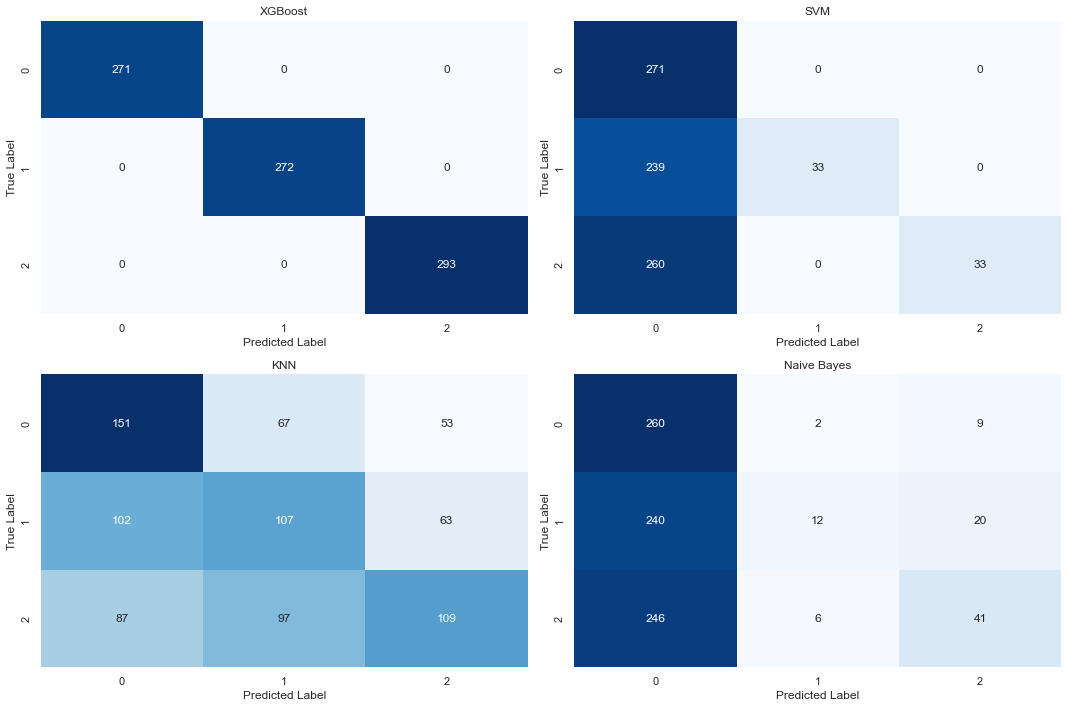

In [120]:
# Import additional libraries needed for plotting evaluation metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a function to plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, title, ax):
    # Calculate the confusion matrix using true and predicted labels
    cm = confusion_matrix(y_true, y_pred)  
    # Visualize the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', cbar=False)  
    # Set the x-axis label to 'Predicted Label'
    ax.set_xlabel('Predicted Label')  
    # Set the y-axis label to True Label
    ax.set_ylabel('True Label')  
    # Set the title of the subplot to the provided title
    ax.set_title(title)  

# Create a function to plot ROC curves
def plot_roc_curve(y_true, y_score, title, ax):
    # Calculate the false positive rate and true positive rate
    fpr, tpr, _ = roc_curve(y_true, y_score)  
    # Calculate the area under the ROC curve
    roc_auc = auc(fpr, tpr)  
    # Plot the ROC curve with the AUC score as the label
    ax.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)  
    # Plot the diagonal line (random classifier)
    ax.plot([0, 1], [0, 1], 'k--')  
    # Set the limits for the x-axis
    ax.set_xlim([0.0, 1.0])  
    # Set the limits for the y-axis
    ax.set_ylim([0.0, 1.05])  
    # Set the x-axis label to 'False Positive Rate'
    ax.set_xlabel('False Positive Rate')  
    # Set the y-axis label to 'True Positive Rate'
    ax.set_ylabel('True Positive Rate')  
    # Set the title of the subplot to the provided title
    ax.set_title(title)  
    # Add a legend to the subplot at the lower right corner
    ax.legend(loc="lower right")  

# Create a function to plot precision-recall curves
def plot_precision_recall_curve(y_true, y_score, title, ax):
    # Calculate precision and recall values
    precision, recall, _ = precision_recall_curve(y_true, y_score)  
    # Calculate the average precision score
    average_precision = average_precision_score(y_true, y_score)  
    # Plot the precision-recall curve
    ax.step(recall, precision, where='post')  
    # Fill the area under the curve with transparency
    ax.fill_between(recall, precision, step='post', alpha=0.2)  
    # Set the x-axis label to 'Recall'
    ax.set_xlabel('Recall')  
    # Set the y-axis label to 'Precision'
    ax.set_ylabel('Precision')  
    # Set the limits for the y-axis
    ax.set_ylim([0.0, 1.05])  
    # Set the limits for the x-axis
    ax.set_xlim([0.0, 1.0])  
    # Set the title of the subplot with Avgerage Precision
    ax.set_title(f'{title} (Avg. Precision = {average_precision:.2f})')  

# Create subplots for confusion matrices
# Create a 2x3 grid of subplots with a specified figure size
fig, axes = plt.subplots(2, 2, figsize=(15, 10))   
# Plot confusion matrix for XGBoost
plot_confusion_matrix(np.array(y_test), best_xgb.predict(X_test), 'XGBoost', axes[0, 0]) 
# Plot confusion matrix for SVM 
plot_confusion_matrix(np.array(y_test), best_svm.predict(X_test), 'SVM', axes[0, 1])
# Plot confusion matrix for KNN  
plot_confusion_matrix(np.array(y_test), best_knn.predict(X_test), 'KNN', axes[1, 0])  
# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(np.array(y_test), clf.predict(X_test), 'Naive Bayes', axes[1, 1])  
# Adjust the spacing between subplots for a better layout
fig.tight_layout()  
# Display the subplots
plt.show()  

## The above code creates a 2x3 grid of subplots with a specified figure size. The plot_confusion_matrix function is then called for each model with the corresponding test data and best estimator model. The function plots a confusion matrix as a heatmap on the subplot with the provided title. The location of each subplot is specified with the axes argument. After plotting all the subplots, the tight_layout() method is used to adjust the spacing between subplots for a better layout. Finally, the subplots are displayed using plt.show().


# ********************************Recommendation Models ****************************

# Given we have a large number of features for book, we have also designed book recommendation systems to give recommendations based on a book.

## We have built a machine learning model for recommending books and now we will need to create a function using Python. When this function is called, we will have to pass the name of the book to it. The model will try to find books based on the features. We’ll store those book names that the system recommends in a list and return them at the end:

In [121]:
def BookRecommender(book_name):
    # Create an empty list to store recommended book titles
    book_list_name = []  
    # Get the index of the given book in the original dataset
    book_id = data_orig[data_orig['title'] == book_name].index  
    # Get the first (and only) index value
    book_id = book_id[0]  
    # Iterate over the indices of similar books
    for newid in idlist[book_id]:  
        # Get the title of each similar book
        title = data_orig.loc[newid].title
        # Add the title to the list if it's not the same as the input book
        if title != book_name:
            book_list_name.append(title)  
    return book_list_name  

BookNames = BookRecommender('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
BookNames  

['The War of Art: Break Through the Blocks & Win Your Inner Creative Battles',
 'Metamorphoses',
 'Why Is Sex Fun? The Evolution of Human Sexuality (Science Masters)',
 'Tales from Ovid',
 'Ghosts (The New York Trilogy  #2)']

## **Content-Based Filtering**: In content-based filtering, you recommend items similar to the ones a user has liked in the past. You can use features like book title, author, and language to calculate similarity between books using measures like cosine similarity or Jaccard similarity. For textual features like title and author, you can use techniques like TF-IDF (Term Frequency-Inverse Document Frequency) or word embeddings to convert text into numerical representations before calculating similarity.

In [122]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer for book titles and authors
# Create a TF-IDF vectorizer object and remove stop words
vectorizer = TfidfVectorizer(stop_words='english')  
# Combine book titles and authors into a single string
combined_features = data_orig['title'] + " " + data_orig['authors']  
# Compute the TF-IDF matrix of the combined strings using the vectorizer
tfidf_matrix = vectorizer.fit_transform(combined_features)  

# Calculate the similarity between all pairs of books in the dataset
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)  

def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the given book
    idx = data_orig[data_orig['title'] == title].index[0]
    # Get the cosine similarity scores for all books in the dataset
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the top 11 most similar books (including the input book itself)
    sim_scores = sim_scores[0:11]
    # Get the indices of the top 11 most similar books
    book_indices = [i[0] for i in sim_scores]
    # Get the titles of the top 11 most similar books
    recommended_books = data_orig['title'].iloc[book_indices]
    # Remove the input book from the recommendations
    recommended_books = recommended_books[recommended_books != title]
    # Return the titles of the top 10 most similar books
    return recommended_books 

# Get recommendations for a specific book
recm = get_recommendations('Harry Potter and the Chamber of Secrets (Harry Potter  #2)')
recm

7             Harry Potter Collection (Harry Potter  #1-6)
12663    Harry Potter and the Goblet of Fire (Harry Pot...
12660    Harry Potter and the Philosopher's Stone (Harr...
695      Harry Potter and the Half-Blood Prince (Harry ...
1429     Harry Potter and the Prisoner of Azkaban (Harr...
13637    Harry Potter y el prisionero de Azkaban (Harry...
13634          Harry Potter Boxed Set (Harry Potter  #1-4)
1123     Harry Potter Y La Piedra Filosofal (Harry Pott...
5295     Harry Potter y la cámara secreta (Harry Potter...
Name: title, dtype: object

# In conclusion, we have explored various data science models for building a book recommendation system. We have used different techniques, such as K-Nearest Neighbors, Content-Based Filtering, and Collaborative Filtering with Matrix Factorization. Additionally, we briefly touched upon Neural Collaborative Filtering as another potential method for recommendation systems. Each of these approaches has its advantages and limitations, and the choice of model depends on the data available and the specific needs of the project. 

## In the end, an effective book recommendation system can greatly enhance user experience on platforms that provide access to books, helping readers discover new titles and authors that align with their interests. As a result, these recommendation systems play a crucial role in driving user engagement and satisfaction.